# Statistics and Trends
## Applied Data Science 1
### MSc Data Science (with placement year)
#### University of Hertfordshire
**Author:** Cristina Baron Suarez <br>
**Student ID:** 23069038 <br>
**Email:** [cb24ack@herts.ac.uk](mailto:cb24ack@herts.ac.uk)  <br>[Github repository](https://github.com/criss-bassu/Statistics_Trends.git))


Labourers from Malaga (Spain) and Tangier (Morocco) were asked to get a blood test in order to carry out a study. It was noted that the workers' energy intake habits were markedly different between the two cities. Labourers from Malaga presented a caloric intake that the researcher, a Moroccan doctor, considered excessive, especially when comparing the meals proportions served at the restaurants in Malaga to the family meals frequently shared in Morocco. The researcher's hypothesis suggests that these food differences could be reflected in the blood test results and the BMI.

The dataset has been provided by the research team from the Faculty of Health Sciences at the University of Malaga.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
# Reading CSV
df = pd.read_csv('comparingDietBlood.csv', sep = ';')

# Convert 'Height' from object to float, replacing ',' with '.'
df['Height'] = df['Height'].str.replace(',', '.').astype(float) # 'Height' into float
df['Group'] = df['Group'].str.replace('Tanger', 'Tangier') # Change from the Spanish name to the English name

# Calculate the BMI rounded to 2 decimals
df['BMI'] = (df['Weight'] / ((df['Height']/100) ** 2)).round(2)

# We will not be using the following columns for the research
df = df.drop(['Systolic BP', 'Diastolic BP', 'Height', 'Weight'], axis = 1)
df.head()

,Group,Cholesterol,Triglycerides,Glucose,Energy Intake,Exercise,BMI
0,Malaga,238,107,89,3521,1400,290437.09
1,Tangier,251,163,90,1490,1730,304779.66
2,Malaga,194,73,89,3701,2180,273356.40
3,Tangier,169,71,65,3200,2150,262507.25
4,Malaga,227,114,121,4124,1700,304052.93


We use descriptive statistics, as well as skewness and kurtosis, to observe the differences between Malaga and Tangier.

In [10]:
# We create an extended version of the describe function in order to add the skewness and the kurtosis
def describe_extended(data):
    """
    Adds skewness and kurtosis to the pandas describe() function.
    Parameter: 
    - data: The DataFrame on which to calculate descriptive statistics.
    Returns: A DataFrame with the descriptive statistics and two additional columns: skewness and kurtosis.
    """
    skewness = data.skew().round(2) # Calculates the skewness of each column. Returns only 2 decimals.
    kurtosis = data.kurtosis().round(2) # Calculates the kurtosis of each column. Returns only 2 decimals.
    
    # Transposes the DataFrames for 'skewness' and 'kurtosis', converting columns into rows
    # Renames the index of the first row to identify each metric
    skewness_df = pd.DataFrame(skewness).T.rename(index = {0: 'skewness'})
    kurtosis_df = pd.DataFrame(kurtosis).T.rename(index = {0: 'kurtosis'})
    
    # Concatenates the new DatFrames to 'describe' (which return only 2 decimals)
    return pd.concat([data.describe().round(2), skewness_df, kurtosis_df])

In [34]:
df_group = df.groupby('Group')

# Applies the function to each group
dg = df_group.apply(describe_extended)
dg

Cholesterol  Triglycerides  Glucose  Energy Intake  \
Group                                                                  
Malaga  count           50.00          50.00    50.00          50.00   
        mean           209.12         113.22    88.18        3528.04   
        std             42.42          69.89    19.03         550.94   
        min            102.00          38.00    48.00        2470.00   
        25%            184.25          66.50    78.50        3179.25   
        50%            203.00          95.00    84.00        3538.50   
        75%            238.00         134.25    90.00        3802.25   
        max            335.00         351.00   159.00        4900.00   
        skewness         0.33           1.81     2.02           0.29   
        kurtosis         1.05           3.75     6.21          -0.29   
Tangier count           30.00          30.00    30.00          30.00   
        mean           162.67          82.13    78.03        1909.17   
        std             44.81          45.18    11.27         469.75   
        min             82.00          38.00    65.00        1452.00   
        25%            136.25          57.00    71.00        1590.00   
        50%            164.50          70.00    75.00        1805.00   
        75%            196.75          93.25    82.00        1987.50   
        max            251.00         271.00   115.00        3500.00   
        skewness         0.09           2.81     1.43           2.16   
        kurtosis        -0.53          10.26     2.70           5.01   

                  Exercise        BMI  
Group                                  
Malaga  count        50.00      50.00  
        mean       1880.30  283600.80  
        std         438.12   31263.44  
        min        1090.00  217993.08  
        25%        1553.50  263069.34  
        50%        1895.00  278913.92  
        75%        2178.75  300115.24  
        max        2910.00  366498.21  
        skewness      0.12       0.80  
        kurtosis     -0.33       1.34  
Tangier count        30.00      30.00  
        mean       1894.20  250498.59  
        std         185.89   25863.28  
        min        1430.00  208085.61  
        25%        1782.50  234528.29  
        50%        1865.00  250346.96  
        75%        2008.75  262113.62  
        max        2258.00  318877.55  
        skewness      0.06       0.66  
        kurtosis      0.23       0.77

Next, we will explore the distribution of energy intake in both groups using histograms.

In [12]:
def plot_histogram(df, groups, var, label):
    """
    Creates an histograms representing the distribution of 'Energy Intake' data for each group.
    Parameters: 
    - df : The Dataframe containing the data
    - groups: A list with the groups
    - var: Variable to study
    - label: Label of the variable
    """
    # Creates two plots, next to each other, that share both axes
    fig, axes = plt.subplots(nrows = 1, ncols = len(groups), figsize = (10, 4), sharex = True, sharey = True, layout = 'constrained')

    for i, group in enumerate(groups):
        # Gets a dataframe with the rows of the group being studied
        dg = df[df['Group'] == group]
        
        # For the rows obtained previously, select the 'Energy Intake' column and divide the data in 20 bins
        axes[i].hist(dg.loc[:, var], bins = 20, color = '#FFB347', edgecolor = 'black')
        axes[i].set_title(group, fontsize = 14)
        axes[i].grid(True)
        axes[i].tick_params(axis = 'both', labelsize = 14) # Changes the size of the ticks in both axis

    fig.supxlabel(label, fontsize = 14)
    fig.supylabel('Count', fontsize = 14)
    plt.show()
    return

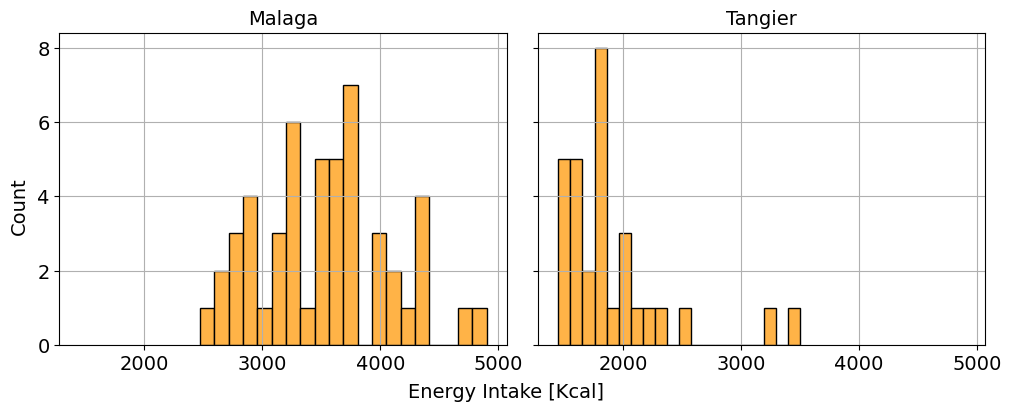

In [14]:
groups = df['Group'].unique() # Gets all the groups
plot_histogram(df, groups, 'Energy Intake', 'Energy Intake [Kcal]')

The histograms reveal a wider distribution of energy intake values in Malaga; whereas in Tangier there are fewer instances reaching higher energy intake levels. Therefore, we can conclude that the energy intake of Tangier is clearly lower.

Using boxplot, we will compare the energy intake and cholesterol levels between the two 
groups.

In [17]:
def plot_boxplot(df, groups, vars, labels):
    """
    Creates a boxplot for each variable.
    Parameters: 
    - df : The Dataframe containing the data
    - groups: A list with the groups
    - vars: A list with the variables to be studied
    - labels: A list with the labels of these variables
    """
    plt.figure(dpi = 144, figsize = (6, 3))

    for i, var in enumerate(vars):
        plt.subplot(1, len(vars), i+1)
        dg = [df[df['Group'] == group][var] for group in groups]
        plt.boxplot(dg, labels = groups)
        plt.ylabel(labels[i], fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)

    plt.tight_layout()
    plt.show()
    return

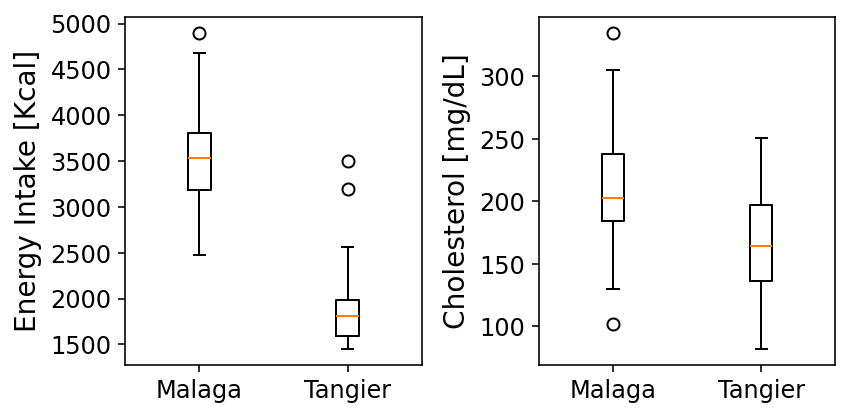

In [19]:
plot_boxplot(df, groups, ['Energy Intake', 'Cholesterol'], ['Energy Intake [Kcal]', 'Cholesterol [mg/dL]'])

The box plots show that the energy intake among the laborers in Malaga is higher compared to those in Tangier. Additionally, cholesterol levels are also higher in the Malaga group, although the difference is less pronounced. Therefore, the data and the researchers' hypothesis appear to align.

Based on the previous plot, we might think there is an association between energy intake and cholesterol that could explain the differences between Malaga and Tangier.

In [21]:
def plot_regresion(df, groups, vars, labels):
    """
    Plots a scatter plot and a linear regression line for 'Energy Intake' and Cholesterol', for each group.
    Aim: Observe how the cholesterol levels correlate with energy intake within different groups.
    Parameters: 
    - df : The Dataframe containing the data
    - groups: A list with the groups.
    - vars: A list with the variables to be studied
    - labels: A list with the labels of these variables
    """
    # Creates the figure and the axes
    fig, ax = plt.subplots(dpi = 144, figsize = (8, 6))

    for group in groups:
        # Gets a dataframe with the rows that belong to the group being studied
        dg = df[df['Group'] == group]
        
        # Generates a scatter plot comparing the cholesterol against the energy intake for the group being studied
        ax.scatter(dg[vars[0]], dg[vars[1]], marker = 'o', s = 10, label = group)

        # Sets a linear regression line (degree 1) to the data
        # Saves the results in the coefficients of the equation of the line
        m, b = np.polyfit(dg[vars[0]], dg[vars[1]], 1)
        
        # Draws a line in the graph given the axes X and the equation of the line
        ax.plot(dg[vars[0]], m * dg[vars[0]] + b, label = f'Regresion {group}')

    ax.grid(True)
    ax.set_xlabel(labels[0], fontsize = 14)
    ax.set_ylabel(labels[1], fontsize = 14)
    ax.tick_params(labelsize = 12)
    ax.legend(fontsize = 12)

    plt.show()
    return

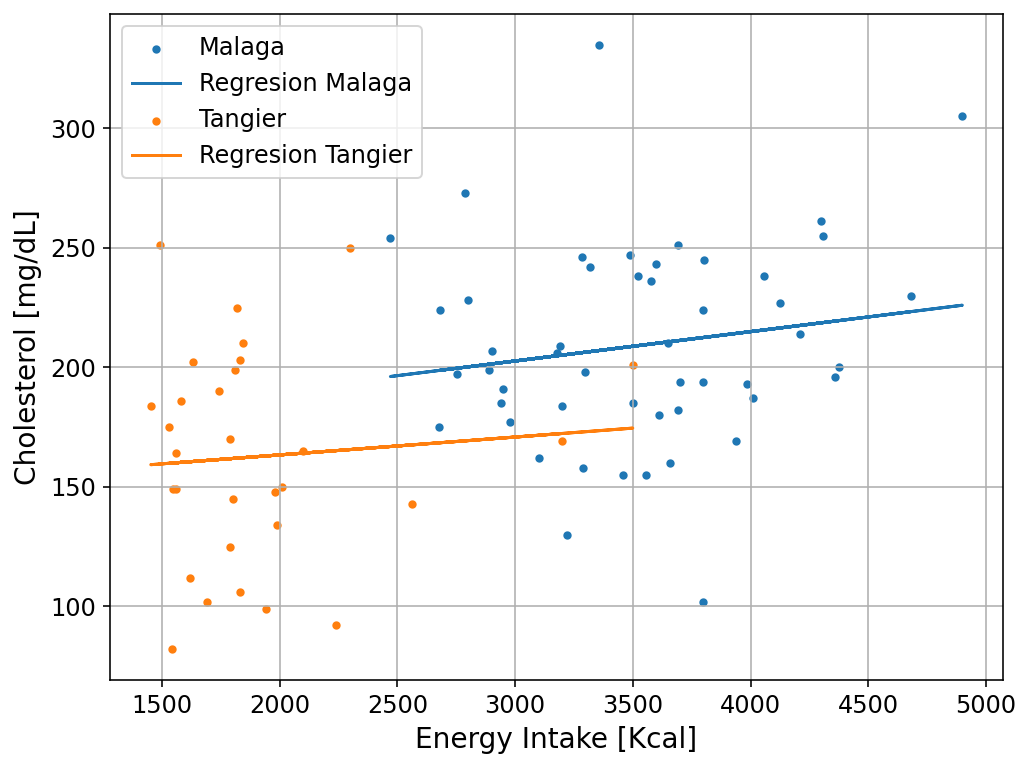

In [23]:
plot_regresion(df, groups, ['Energy Intake', 'Cholesterol'], ['Energy Intake [Kcal]', 'Cholesterol [mg/dL]'])

Apparently, a higher energy intake is associated with an increase in cholesterol levels: Both regression lines have a positive slope and are almost parallel, but at different levels. This means that a large difference in energy intake will not explain on its own the reasons behind the differences in cholesterol levels between Malaga and Tangier. That is to say, there must be other reasons that should be studied.

A variable that might counteract the effect of energy intake is exercise (measured in kilocalories). Next, we will explore the degree of linear association between all numerical variables by displaying the Pearson correlation matrix for every possible pair.

In [26]:
def heatmap(corr_matrix):
    """
    Plots a heatmap for a correlation matrix, showing correlations between variables.
    Parameters: 
    - corr_matrix: A DataFrame representing a correlation matrix where the indices and columns are variables.
    """
    fig, ax = plt.subplots(dpi = 144)

    # Mask for the upper triangle of the heatmap
    mask = np.triu(np.ones_like(corr_matrix))
    
    sns.heatmap(corr_matrix,
                ax = ax,
                vmin = -1, # Minimum value
                vmax = 1, # Maximum value
                cmap = 'RdBu', # Red-Blue colormap
                annot = True, # Display values in each cell
                mask = mask) # Hiding upper triangle
    
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
    return

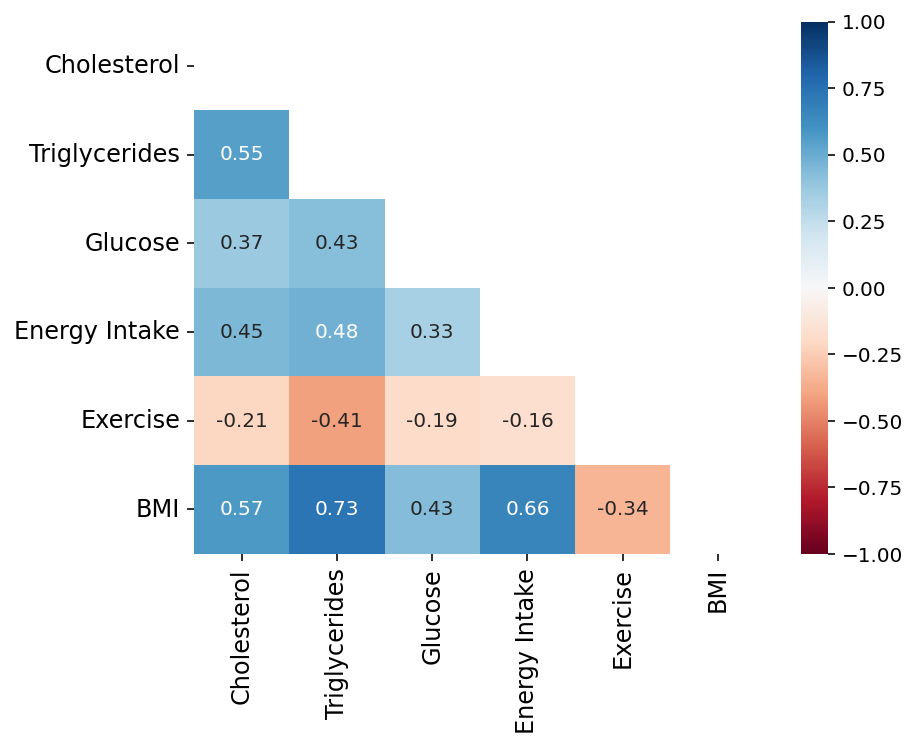

In [28]:
corr_matrix = df.drop(columns = ['Group']).corr(method = 'pearson') # The Group column does not have numerical values
heatmap(corr_matrix)

Now we can see how the energy intake is directly correlated with cholesterol, triglycerides, glucose, and, especially, the BMI. In contrast, the exercise is inversely correlated with these variables, although more weakly.